In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pmaw import PushshiftAPI
api = PushshiftAPI()


def fxn(item):
    return (item['score'] > 0) & (item['over_18'] == False)
posts = api.search_submissions(filter_fn=fxn, subreddit="dominion", limit=50000)
post_list = [post for post in posts]

len(post_list)


Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift sh

7121

In [3]:
df = pd.DataFrame(post_list)
start = 5000
inc = 10
for i in range(start,start+inc):
    print(f'i = {i}')
    print(df['title'].iloc[i])
    print(f'\t{df["full_link"].iloc[i]}')

i = 5000
KotW 1/29: Baron, Bishop, Contraband, Goons, Merchant Guild, Mining Village, Monument, Diplomat, Steward, Stonemason. Colony/Platinum. [Intrigue, Prosperity, Guilds]
	https://www.reddit.com/r/dominion/comments/5qzn8k/kotw_129_baron_bishop_contraband_goons_merchant/
i = 5001
Adventurer -1 card interaction
	https://www.reddit.com/r/dominion/comments/5qyzos/adventurer_1_card_interaction/
i = 5002
Hobby Lobby now carries a dark-stained storage box
	https://www.reddit.com/r/dominion/comments/5qycx5/hobby_lobby_now_carries_a_darkstained_storage_box/
i = 5003
How do you choose kingdoms in each game?
	https://www.reddit.com/r/dominion/comments/5qwp0j/how_do_you_choose_kingdoms_in_each_game/
i = 5004
Recommended set of cards?
	https://www.reddit.com/r/dominion/comments/5qwobb/recommended_set_of_cards/
i = 5005
Victory cards only (almost) set, final score 86-108
	https://www.reddit.com/r/dominion/comments/5qw3lu/victory_cards_only_almost_set_final_score_86108/
i = 5006
I won by buying a

In [4]:
list(zip(df.columns,df.iloc[3033]))

[('all_awardings', []),
 ('allow_live_comments', False),
 ('author', 'juels_123'),
 ('author_flair_css_class', None),
 ('author_flair_richtext', []),
 ('author_flair_text', None),
 ('author_flair_type', 'text'),
 ('author_fullname', 't2_144lpr'),
 ('author_is_blocked', nan),
 ('author_patreon_flair', False),
 ('author_premium', False),
 ('awarders', []),
 ('can_mod_post', False),
 ('contest_mode', False),
 ('created_utc', 1585798722),
 ('domain', 'self.dominion'),
 ('full_link',
  'https://www.reddit.com/r/dominion/comments/ftf76x/best_cards_to_use_for_base_and_hinterlands/'),
 ('gildings', {}),
 ('id', 'ftf76x'),
 ('is_created_from_ads_ui', nan),
 ('is_crosspostable', True),
 ('is_meta', False),
 ('is_original_content', False),
 ('is_reddit_media_domain', False),
 ('is_robot_indexable', True),
 ('is_self', True),
 ('is_video', False),
 ('link_flair_background_color', ''),
 ('link_flair_richtext', []),
 ('link_flair_text_color', 'dark'),
 ('link_flair_type', 'text'),
 ('locked', False)

(array([2.384e+03, 1.421e+03, 7.420e+02, 2.970e+02, 1.870e+02, 9.100e+01,
        5.800e+01, 2.300e+01, 1.200e+01, 1.300e+01, 9.000e+00, 8.000e+00,
        5.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00]),
 array([  2. ,   9.5,  17. ,  24.5,  32. ,  39.5,  47. ,  54.5,  62. ,
         69.5,  77. ,  84.5,  92. ,  99.5, 107. , 114.5, 122. , 129.5,
        137. , 144.5, 152. ]),
 <BarContainer object of 20 artists>)

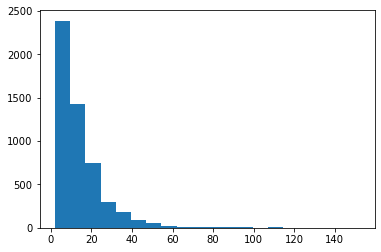

In [6]:
# import seaborn as sns
# sns.histplot(df['num_comments'])
df2 = df[(df['num_comments'] > 1) ]
plt.hist((df2['num_comments']), bins = 20)
# df['num_comments'].value_counts()

In [9]:
med = df['num_comments'].median()

In [13]:
df[df['num_comments'] <= med].shape

(3693, 101)

In [14]:
df[df['num_comments'] > med].shape

(3428, 101)

In [16]:
df2 = df[['title', 'created_utc', 'full_link', 'num_comments' ]]

In [18]:
df2.to_csv('../data/reddit_dominion.csv')